In [179]:
# EV charging stations


import pandas as pd

# Load the dataset
df = pd.read_csv(r'EV_Stations_data.csv')

In [180]:
# Explore data set and identifying potential features
print(df.info())
print(df.describe().to_string())
print(df.head(5).to_string()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Station Name              385 non-null    object
 1   Street Address            385 non-null    object
 2   City                      385 non-null    object
 3   Access Days Time          385 non-null    object
 4   EV Level1 EVSE Num        385 non-null    object
 5   EV Level2 EVSE Num        385 non-null    object
 6   EV DC Fast Count          385 non-null    object
 7   EV Other Info             385 non-null    object
 8   New Georeferenced Column  385 non-null    object
dtypes: object(9)
memory usage: 27.2+ KB
None
                                Station Name Street Address      City Access Days Time EV Level1 EVSE Num EV Level2 EVSE Num EV DC Fast Count EV Other Info      New Georeferenced Column
count                                    385            385       385 

In [181]:
# Identify missing values

missing_values = df.isnull().sum()
total_values = df.shape[0]
missing_percentage = (missing_values / total_values) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_info)


                          Missing Values  Percentage
Station Name                           0         0.0
Street Address                         0         0.0
City                                   0         0.0
Access Days Time                       0         0.0
EV Level1 EVSE Num                     0         0.0
EV Level2 EVSE Num                     0         0.0
EV DC Fast Count                       0         0.0
EV Other Info                          0         0.0
New Georeferenced Column               0         0.0


In [182]:
# Column renaming (Whitespaces)
def col_rename(df):
  # Using list comprehension to create a new column list with replaced names
  df.columns = [col.replace(' ', '_') for col in df.columns]
  return df

newdf = col_rename(df.copy())

# newdf is copy of dataset where we shall be making changes
print(df.columns)
print(df.head(5).to_string())
print()
print(newdf.columns)
print(newdf.head(5).to_string())

Index(['Station Name', 'Street Address', 'City', 'Access Days Time',
       'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count',
       'EV Other Info', 'New Georeferenced Column'],
      dtype='object')
                          Station Name          Street Address          City                    Access Days Time EV Level1 EVSE Num EV Level2 EVSE Num EV DC Fast Count EV Other Info              New Georeferenced Column
0                        BMW OF DARIEN        138-142 Ledge Rd        Darien                      24 hours daily               NONE                  2             NONE          NONE         POINT (-73.4764687 41.072882)
1         Dunkin’ - Tesla Supercharger           893 E Main St       Meriden  24 hours daily; for Tesla use only               NONE               NONE                8          NONE          POINT (-72.773473 41.527367)
2  Town of Beacon Falls - Commuter Lot           105 N Main St  Beacon Falls                      24 hours daily             

In [183]:
import numpy as np
# changing values 'NONE' in columns to be represented by 0
# newdf= newdf.replace('NONE','0')
newdf['EV_Level1_EVSE_Num'] = newdf['EV_Level1_EVSE_Num'].replace('NONE', 0).astype(np.int64)
newdf['EV_Level2_EVSE_Num'] = newdf['EV_Level2_EVSE_Num'].replace('NONE', 0).astype(np.int64)
newdf['EV_DC_Fast_Count'] = newdf['EV_DC_Fast_Count'].replace('NONE', 0).astype(np.int64)


print(newdf.head(5).to_string())
print(newdf.info())

                          Station_Name          Street_Address          City                    Access_Days_Time  EV_Level1_EVSE_Num  EV_Level2_EVSE_Num  EV_DC_Fast_Count EV_Other_Info              New_Georeferenced_Column
0                        BMW OF DARIEN        138-142 Ledge Rd        Darien                      24 hours daily                   0                   2                 0          NONE         POINT (-73.4764687 41.072882)
1         Dunkin’ - Tesla Supercharger           893 E Main St       Meriden  24 hours daily; for Tesla use only                   0                   0                 8          NONE          POINT (-72.773473 41.527367)
2  Town of Beacon Falls - Commuter Lot           105 N Main St  Beacon Falls                      24 hours daily                   0                   1                 0          NONE  POINT (-73.065583 41.44548100000001)
3                      OLD SAYBROOK VW  319 Middlesex Turnpike  Old Saybrook                      24 hours d

In [184]:
# changing datatype from object to integers

try:
  for col in ['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count']:
    newdf[col] = pd.to_numeric(newdf[col], errors='coerce')  # Handle conversion errors
    
except:
  pass 

print(newdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Station_Name              385 non-null    object
 1   Street_Address            385 non-null    object
 2   City                      385 non-null    object
 3   Access_Days_Time          385 non-null    object
 4   EV_Level1_EVSE_Num        385 non-null    int64 
 5   EV_Level2_EVSE_Num        385 non-null    int64 
 6   EV_DC_Fast_Count          385 non-null    int64 
 7   EV_Other_Info             385 non-null    object
 8   New_Georeferenced_Column  385 non-null    object
dtypes: int64(3), object(6)
memory usage: 27.2+ KB
None


In [185]:
# changing other column data types to string

# # Convert specified columns to string
# column_strings = ['Station_Name', 'Street_Address', 'City']  
# try:
#     newdf[column_strings] = newdf[column_strings].astype(str)
# except (KeyError, TypeError) as e:  # Handle potential errors
#     print(f"Error during conversion: {e}")
# print(newdf.dtypes)



In [186]:
print(newdf.describe())
print(newdf.info())


       EV_Level1_EVSE_Num  EV_Level2_EVSE_Num  EV_DC_Fast_Count
count          385.000000          385.000000        385.000000
mean             0.054545            2.036364          0.597403
std              0.489085            1.845244          2.131484
min              0.000000            0.000000          0.000000
25%              0.000000            1.000000          0.000000
50%              0.000000            2.000000          0.000000
75%              0.000000            2.000000          0.000000
max              8.000000           17.000000         16.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Station_Name              385 non-null    object
 1   Street_Address            385 non-null    object
 2   City                      385 non-null    object
 3   Access_Days_Time          385 non-null    obj

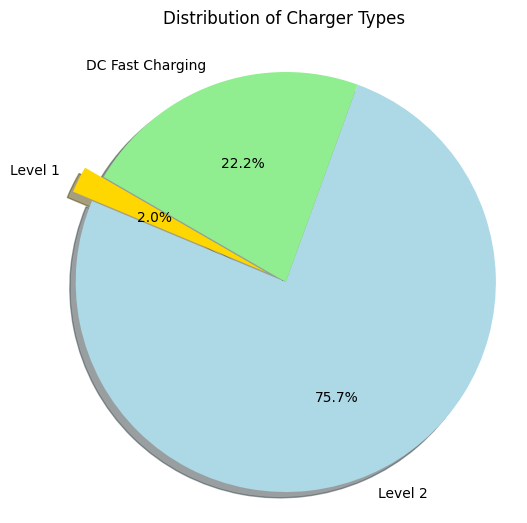

In [187]:

# Piechart representing the total distribution of charger types.

import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns


# Charging Level Distribution (Pie Chart)
level1_count = newdf['EV_Level1_EVSE_Num'].sum()
level2_count = newdf['EV_Level2_EVSE_Num'].sum()
dc_fast_count = newdf['EV_DC_Fast_Count'].sum()

counts = [level1_count, level2_count, dc_fast_count]
labels = ['Level 1', 'Level 2', 'DC Fast Charging']
colors = ['gold', 'lightblue', 'lightgreen']
explode = (0.1, 0, 0)

# Create a pie chart using Matplotlib
plt.figure(figsize=(6, 6))  
plt.pie(counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=150)  # Customize labels and appearance


plt.title('Distribution of Charger Types', pad=20)
plt.axis('equal')  # Equal aspect ratio for a circular pie chart
plt.show()

The pie chart shows the distribution of different types of EV chargers:

Level 1 Chargers: Basic chargers, typically used at home or in places where vehicles are parked for long periods.

Level 2 Chargers: Faster chargers, commonly found in public places such as shopping centers, workplaces, and parking garages.

DC Fast Chargers: High-speed chargers, ideal for quick charging at locations such as highway rest stops and commercial charging stations.

In [188]:
import folium
from folium.plugins import HeatMap
import re

# Function to extract latitude and longitude from 'New Georeferenced Column'
def extract_lat_lon(geo_str):
    match = re.search(r'POINT \(([-\d.]+) ([-\d.]+)\)', geo_str)
    if match:
        lon, lat = match.groups()
        return float(lat), float(lon)
    return None, None

# Apply the function to create separate 'Latitude' and 'Longitude' columns
df['Latitude'], df['Longitude'] = zip(*df['New Georeferenced Column'].apply(extract_lat_lon))

# Convert relevant columns to numeric values
df['EV DC Fast Count'] = pd.to_numeric(df['EV DC Fast Count'], errors='coerce').fillna(0).astype(int)
df['EV Level2 EVSE Num'] = pd.to_numeric(df['EV Level2 EVSE Num'], errors='coerce').fillna(0).astype(int)
df['EV Level1 EVSE Num'] = pd.to_numeric(df['EV Level1 EVSE Num'], errors='coerce').fillna(0).astype(int)

# Define a color map for different levels
def get_marker_color(row):
    if row['EV DC Fast Count'] > 0:
        return 'red'
    elif row['EV Level2 EVSE Num'] > 0:
        return 'blue'
    elif row['EV Level1 EVSE Num'] > 0:
        return 'green'
    else:
        return 'gray'

# Create a map centered around an average location
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add charging stations to the map
for idx, row in df.iterrows():
    marker_color = get_marker_color(row)
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Station Name'],
        tooltip=f"{row['City']} - Level1: {row['EV Level1 EVSE Num']}, Level2: {row['EV Level2 EVSE Num']}, DC Fast: {row['EV DC Fast Count']}",
        icon=folium.Icon(color=marker_color,icon_size=(18, 18),  icon='circle')
    ).add_to(m)

# Display the map
m

# Save the map as an HTML file
# m.save('EV_Charging_Stations.html')


In [ ]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#analyze each city and calculate the distances between charging stations.

from geopy.distance import geodesic

def analyze_city(city_data):
    # Calculate the distance between each pair of charging stations in the city
    distances = []
    for i in range(len(city_data)):
        for j in range(i + 1, len(city_data)):
            coord1 = (city_data.iloc[i]['Latitude'], city_data.iloc[i]['Longitude'])
            coord2 = (city_data.iloc[j]['Latitude'], city_data.iloc[j]['Longitude'])
            distance = geodesic(coord1, coord2).kilometers
            distances.append(distance)
    
    # Return the minimum, maximum, and average distances
    if distances:
        return {
            'min_distance': min(distances),
            'max_distance': max(distances),
            'avg_distance': sum(distances) / len(distances),
            'total_stations': len(city_data)
        }
    else:
        return {
            'min_distance': None,
            'max_distance': None,
            'avg_distance': None,
            'total_stations': len(city_data)
        }

# Analyze each city
city_stats = {}
for city in df['City'].unique():
    city_data = df[df['City'] == city]
    city_stats[city] = analyze_city(city_data)

# Convert city_stats to a DataFrame for easy analysis
city_stats_df = pd.DataFrame(city_stats).transpose()
city_stats_df.head()


,min_distance,max_distance,avg_distance,total_stations
Darien,0.023863,4.697350,1.948745,8.0
Meriden,0.117504,2.915612,1.162084,6.0
Beacon Falls,NaN,NaN,NaN,1.0
Old Saybrook,0.020153,5.506738,3.145803,6.0
Fairfield,0.024324,8.796319,2.950214,20.0


In [ ]:
# Filter data for a specific city
city_data = df[df['City'] == 'Stamford']

# Calculate distances between charging stations in the city
distances = []
for i in range(len(city_data)):
    for j in range(i + 1, len(city_data)):
        coord1 = (city_data.iloc[i]['Latitude'], city_data.iloc[i]['Longitude'])
        coord2 = (city_data.iloc[j]['Latitude'], city_data.iloc[j]['Longitude'])
        distance = geodesic(coord1, coord2).kilometers
        distances.append(distance)

# Calculate min, max, and average distances
min_distance = min(distances) if distances else None
max_distance = max(distances) if distances else None
avg_distance = sum(distances) / len(distances) if distances else None

# Display results
min_distance, max_distance, avg_distance, len(city_data)

#len(city_data) calculates the number of charging stations located in the city of 'Stamford'

In [ ]:
pip install statsmodels

In [ ]:
# Feature engineering

# Create a feature for the total number of charging points
newdf['Total_EVSE_Num'] = newdf['EV_Level1_EVSE_Num'] + newdf['EV_Level2_EVSE_Num'] + newdf['EV_DC_Fast_Count']

print(newdf.head(4).to_string())


                          Station_Name          Street_Address          City                    Access_Days_Time  EV_Level1_EVSE_Num  EV_Level2_EVSE_Num  EV_DC_Fast_Count EV_Other_Info              New_Georeferenced_Column  Total_EVSE_Num
0                        BMW OF DARIEN        138-142 Ledge Rd        Darien                      24 hours daily                   0                   2                 0          NONE         POINT (-73.4764687 41.072882)               2
1         Dunkin’ - Tesla Supercharger           893 E Main St       Meriden  24 hours daily; for Tesla use only                   0                   0                 8          NONE          POINT (-72.773473 41.527367)               8
2  Town of Beacon Falls - Commuter Lot           105 N Main St  Beacon Falls                      24 hours daily                   0                   1                 0          NONE  POINT (-73.065583 41.44548100000001)               1
3                      OLD SAYBROOK VW  319 

In [ ]:
print(newdf.columns)

Index(['Station_Name', 'Street_Address', 'City', 'Access_Days_Time',
       'EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count',
       'EV_Other_Info', 'New_Georeferenced_Column', 'Total_EVSE_Num'],
      dtype='object')


In [ ]:
# extracting longitude and latitude and creating separate columns 
import re

# Function to extract latitude and longitude from 'newgeoferencedcolumn'
def extract_coordinates(point):
    match = re.search(r'POINT \(([-\d.]+) ([-\d.]+)\)', point)
    if match:
        return float(match.group(1)), float(match.group(2))
    return None, None

# Apply the function to create latitude and longitude columns
newdf['longitude'], newdf['latitude'] = zip(*newdf['New_Georeferenced_Column'].apply(extract_coordinates))

# Display the dataframe with new columns
print(newdf.head())


                          Station_Name          Street_Address          City  \
0                        BMW OF DARIEN        138-142 Ledge Rd        Darien   
1         Dunkin’ - Tesla Supercharger           893 E Main St       Meriden   
2  Town of Beacon Falls - Commuter Lot           105 N Main St  Beacon Falls   
3                      OLD SAYBROOK VW  319 Middlesex Turnpike  Old Saybrook   
4               Fairfield Rail Station        80 Mill Plain Rd     Fairfield   

                     Access_Days_Time  EV_Level1_EVSE_Num  EV_Level2_EVSE_Num  \
0                      24 hours daily                   0                   2   
1  24 hours daily; for Tesla use only                   0                   0   
2                      24 hours daily                   0                   1   
3                      24 hours daily                   0                   2   
4                      24 hours daily                   0                   2   

   EV_DC_Fast_Count EV_Other_Inf

In [ ]:
numeric_columns = newdf.select_dtypes(include=['number']).columns
newdf_numeric = newdf[numeric_columns] #only the numeric columns are used to calculate the correlations,


In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(newdf_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
pip install plotly

In [ ]:
import plotly.express as px

fig = px.scatter_3d(newdf, x='City', y='longitude', z='latitude', color='Station_Name')
fig.show()


In [ ]:
# Data splitting, traning and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = newdf[['longitude', 'latitude']]
y = newdf['EV_Level2_EVSE_Num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Cross-validation
scores = cross_val_score(model, X, y, cv=5)
mean_cv_score = scores.mean()

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("mean cross validation score:", mean_cv_score)
print("mse score:", mse)
print("r2 score:", r2)


mean cross validation score: -0.043114443648357745
mse score: 2.477947065993489
r2 score: -0.006697831593490244


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

(mse_dt, r2_dt, mse_rf, r2_rf)

# mse_dt: Mean Squared Error for the Decision Tree model.
# r2_dt: R^2 Score for the Decision Tree model.
# mse_rf: Mean Squared Error for the Random Forest model.
# r2_rf: R^2 Score for the Random Forest model.

(3.3376623376623376,
 -0.3559682061121008,
 2.677003896103896,
 -0.08756722625736613)

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import numpy as np



# Initialize geolocator
geolocator = Nominatim(user_agent="ev_stations_locator")

# Function to get coordinates from city name
def get_coordinates(city_name):
    location = geolocator.geocode(city_name)
    if location:
        return (location.latitude, location.longitude)
    else:
        raise ValueError(f"Could not geocode city: {city_name}")

# Get coordinates for start and end cities
city_A = "New Fairfield"
city_B = "Fairfield"
Starting_location = get_coordinates(city_A)
Destination = get_coordinates(city_B)

# Function to find nearest charging station
def find_nearest_charging_station(point, stations):
    distances = stations.apply(lambda row: geodesic(point, (row['latitude'], row['longitude'])).miles, axis=1)
    nearest_index = distances.idxmin()
    return stations.loc[nearest_index], distances.min()

# Find the nearest charging stations to point A and point B
nearest_station_A, distance_to_A = find_nearest_charging_station(Starting_location, newdf)
nearest_station_B, distance_to_B = find_nearest_charging_station(Destination, newdf)

# Define a function to find stations along the route
def find_stations_along_route(Starting_location, Destination, stations, radius=10):
    route_stations = []
    for _, row in stations.iterrows():
        if geodesic(Starting_location, (row['latitude'], row['longitude'])).miles <= radius or \
           geodesic(Destination, (row['latitude'], row['longitude'])).miles <= radius:
            route_stations.append(row)
    return pd.DataFrame(route_stations)

# Find stations along the route
stations_along_route = find_stations_along_route(Starting_location, Destination, newdf)

nearest_station_A_info = nearest_station_A[['Station_Name', 'City', 'latitude', 'longitude']]
nearest_station_B_info = nearest_station_B[['Station_Name', 'City', 'latitude', 'longitude']]

# nearest_station_A_info, distance_to_A, nearest_station_B_info, distance_to_B, stations_along_route

print("stations along route:" , stations_along_route.to_string())


stations along route:                                Station_Name         Street_Address           City                                                  Access_Days_Time  EV_Level1_EVSE_Num  EV_Level2_EVSE_Num  EV_DC_Fast_Count EV_Other_Info        New_Georeferenced_Column  Total_EVSE_Num  longitude   latitude  distance_to_A  distance_to_B
59                            LIBRARY KIOSK             24 Main St    New Milford                                                    24 hours daily                   0                   1                 0          NONE    POINT (-73.41116 41.5785572)               1 -73.411160  41.578557      13.914900      20.718204
102                         WHOLE FOODS MKT      5 Sugar Hollow Rd        Danbury                                                    24 hours daily                   0                   1                 0          NONE   POINT (-73.475576 41.3777667)               1 -73.475576  41.377767       9.889169       2.615203
114       Town of 

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import numpy as np
import plotly.express as px

# Initialize geolocator
geolocator = Nominatim(user_agent="ev_stations_locator")

# Function to get coordinates from city name
def get_coordinates(city_name):
    location = geolocator.geocode(city_name)
    if location:
        return (location.latitude, location.longitude)
    else:
        raise ValueError(f"Could not geocode city: {city_name}")

# Get coordinates for start and end cities
city_A = "New fairfield"
city_B = "Danbury"
Starting_location = get_coordinates(city_A)
Destination = get_coordinates(city_B)

# Function to find nearest charging station
def find_nearest_charging_station(point, stations):
    distances = stations.apply(lambda row: geodesic(point, (row['latitude'], row['longitude'])).miles, axis=1)
    nearest_index = distances.idxmin()
    return stations.loc[nearest_index], distances.min()

# Find the nearest charging stations to point A and point B
nearest_station_A, distance_to_A = find_nearest_charging_station(Starting_location, newdf)
nearest_station_B, distance_to_B = find_nearest_charging_station(Destination, newdf)

# Define a function to find stations along the route
def find_stations_along_route(Starting_location, Destination, stations, radius=10):
    route_stations = []
    for _, row in stations.iterrows():
        if geodesic(Starting_location, (row['latitude'], row['longitude'])).miles <= radius or \
           geodesic(Destination, (row['latitude'], row['longitude'])).miles <= radius:
            route_stations.append(row)
    return pd.DataFrame(route_stations)

# Find stations along the route
stations_along_route = find_stations_along_route(Starting_location, Destination, newdf)

nearest_station_A_info = nearest_station_A[['Station_Name', 'City', 'latitude', 'longitude']]
nearest_station_B_info = nearest_station_B[['Station_Name', 'City', 'latitude', 'longitude']]

# Prepare data for visualization
data = {
    'name': ['Starting Location', 'Nearest Station A', 'Destination', 'Nearest Station B'] + stations_along_route['Station_Name'].tolist(),
    'latitude': [Starting_location[0], nearest_station_A['latitude'], Destination[0], nearest_station_B['latitude']] + stations_along_route['latitude'].tolist(),
    'longitude': [Starting_location[1], nearest_station_A['longitude'], Destination[1], nearest_station_B['longitude']] + stations_along_route['longitude'].tolist(),
    'type': ['Starting Location', 'Nearest Station A', 'Destination', 'Nearest Station B'] + ['Charging Station'] * len(stations_along_route),
    'city': [city_A, nearest_station_A['City'], city_B, nearest_station_B['City']] + stations_along_route['City'].tolist(),
    'street_address': [city_A, nearest_station_A['Street_Address'], city_B, nearest_station_B['Street_Address']] + stations_along_route['Street_Address'].tolist()
}

df_vis = pd.DataFrame(data)

# Create the map plot
fig = px.scatter_mapbox(df_vis, lat='latitude', lon='longitude', text='name', color='type',
                        hover_data=['city', 'street_address'], mapbox_style='carto-positron', zoom=8, height=600)

# Add lines to connect the points
fig.add_trace(px.line_mapbox(df_vis, lat='latitude', lon='longitude').data[0])

# Adjust layout for clarity
fig.update_layout(
    title="Charging Stations Along the Route from Starting Location to Destination",
    margin={"r":0,"t":0,"l":0,"b":0},
    showlegend=True
)

fig.show()

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import plotly.express as px

# Initialize geolocator
geolocator = Nominatim(user_agent="ev_stations_locator")

# Function to get coordinates from city name
def get_coordinates(city_name):
    location = geolocator.geocode(city_name)
    if location:
        return (location.latitude, location.longitude)
    else:
        raise ValueError(f"Could not geocode city: {city_name}")

# Get coordinates for start and end cities
city_A = "New Fairfield"
city_B = "Danbury"
Starting_location = get_coordinates(city_A)
Destination = get_coordinates(city_B)

# Assuming newdf is already defined and contains necessary columns ('latitude', 'longitude')
# Pre-calculate distances from each station to starting and ending points
newdf['distance_to_A'] = newdf.apply(lambda row: geodesic((row['latitude'], row['longitude']), Starting_location).miles, axis=1)
newdf['distance_to_B'] = newdf.apply(lambda row: geodesic((row['latitude'], row['longitude']), Destination).miles, axis=1)

# Find the nearest charging stations to point A and point B
nearest_station_A, distance_to_A = find_nearest_charging_station(Starting_location, newdf)
nearest_station_B, distance_to_B = find_nearest_charging_station(Destination, newdf)

# Find stations along the route
stations_along_route = find_stations_along_route(Starting_location, Destination, newdf)

# Prepare data for visualization
data = {
    'name': ['Starting Location', 'Nearest Station A', 'Destination', 'Nearest Station B'] + stations_along_route['Station_Name'].tolist(),
    'latitude': [Starting_location[0], nearest_station_A['latitude'], Destination[0], nearest_station_B['latitude']] + stations_along_route['latitude'].tolist(),
    'longitude': [Starting_location[1], nearest_station_A['longitude'], Destination[1], nearest_station_B['longitude']] + stations_along_route['longitude'].tolist(),
    'type': ['Starting Location', 'Nearest Station A', 'Destination', 'Nearest Station B'] + ['Charging Station'] * len(stations_along_route),
    'city': [city_A, nearest_station_A['City'], city_B, nearest_station_B['City']] + stations_along_route['City'].tolist(),
    'street_address': [city_A, nearest_station_A['Street_Address'], city_B, nearest_station_B['Street_Address']] + stations_along_route['Street_Address'].tolist(),
    'distance_to_A': [None] + [distance_to_A] + [None] + [None] + stations_along_route['distance_to_A'].tolist(),  # Include distances in the data
    'distance_to_B': [None] + [None] + [None] + [distance_to_B] + stations_along_route['distance_to_B'].tolist()  # Include distances in the data
}

df_vis = pd.DataFrame(data)

# Create the map plot
fig = px.scatter_mapbox(df_vis, lat='latitude', lon='longitude', text='name', color='type',
                        hover_data=['city', 'street_address', 'distance_to_A', 'distance_to_B'], mapbox_style='carto-positron', zoom=8, height=600)

# Add lines to connect the points
fig.add_trace(px.line_mapbox(df_vis, lat='latitude', lon='longitude').data[0])

# Adjust layout for clarity
fig.update_layout(
    title="Charging Stations Along the Route from Starting Location to Destination",
    margin={"r":0,"t":0,"l":0,"b":0},
    showlegend=True
)

fig.show()


In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import plotly.express as px

# Initialize geolocator
geolocator = Nominatim(user_agent="ev_stations_locator")

# Function to get coordinates from city name
def get_coordinates(city_name):
    location = geolocator.geocode(city_name)
    if location:
        return (location.latitude, location.longitude)
    else:
        raise ValueError(f"Could not geocode city: {city_name}")

# Function to find the nearest charging station
def find_nearest_charging_station(point, stations):
    distances = stations.apply(lambda row: geodesic((row['latitude'], row['longitude']), point).kilometers, axis=1)
    nearest_index = distances.idxmin()
    return stations.loc[nearest_index], distances.min()

# Function to find stations along the route
def find_stations_along_route(start, end, stations, radius=10):
    route_stations = []
    for _, row in stations.iterrows():
        if geodesic(start, (row['latitude'], row['longitude'])).kilometers <= radius or \
           geodesic(end, (row['latitude'], row['longitude'])).kilometers <= radius:
            route_stations.append(row)
    return pd.DataFrame(route_stations)

# Get coordinates for start and end cities
city_Start = "New Fairfield" # city start A
city_End = "Danbury" # city start B
Starting_location = get_coordinates(city_A)
Destination = get_coordinates(city_B)

# distance_to_A is Distance from each charging station to the starting location (City Start).
# distance_to_B: Distance from each charging station to the destination (City B).

# Pre-calculate distances from each station to starting and ending points
newdf['distance_to_A'] = newdf.apply(lambda row: geodesic((row['latitude'], row['longitude']), Starting_location).kilometers, axis=1)
newdf['distance_to_B'] = newdf.apply(lambda row: geodesic((row['latitude'], row['longitude']), Destination).kilometers, axis=1)

# Find the nearest charging stations to point A and point B
nearest_station_A, distance_to_A = find_nearest_charging_station(Starting_location, newdf)
nearest_station_B, distance_to_B = find_nearest_charging_station(Destination, newdf)

# Find stations along the route
stations_along_route = find_stations_along_route(Starting_location, Destination, newdf)

# Prepare data for visualization
data = {
    'name': ['Starting Location', 'Nearest Station A', 'Destination', 'Nearest Station B'] + stations_along_route['Station_Name'].tolist(),
    'latitude': [Starting_location[0], nearest_station_A['latitude'], Destination[0], nearest_station_B['latitude']] + stations_along_route['latitude'].tolist(),
    'longitude': [Starting_location[1], nearest_station_A['longitude'], Destination[1], nearest_station_B['longitude']] + stations_along_route['longitude'].tolist(),
    'type': ['Starting Location', 'Nearest Station A', 'Destination', 'Nearest Station B'] + ['Charging Station'] * len(stations_along_route),
    'city': [city_Start, nearest_station_A['City'], city_End, nearest_station_B['City']] + stations_along_route['City'].tolist(),
    'street_address': [city_Start, nearest_station_A['Street_Address'], city_End, nearest_station_B['Street_Address']] + stations_along_route['Street_Address'].tolist(),
    'distance_to_A': [None] + [distance_to_A] + [None] + [None] + stations_along_route['distance_to_A'].tolist(),
    'distance_to_B': [None] + [None] + [None] + [distance_to_B] + stations_along_route['distance_to_B'].tolist()
}

df_vis = pd.DataFrame(data)

# Check if the DataFrame has been prepared correctly
print(df_vis.to_string())

# Create the map plot
fig = px.scatter_mapbox(df_vis, lat='latitude', lon='longitude', text='name', color='type',
                        hover_data={'name': True, 'city': True, 'street_address': True,
                                    'distance_to_A': True, 'distance_to_B': True},
                        mapbox_style='carto-positron', zoom=8, height=600)


fig.add_trace(px.line_mapbox(df_vis, lat='latitude', lon='longitude',  text='street_address').data[0])


fig.update_layout(
    title="Charging Stations Along the Route from Starting Location to Destination",
    margin={"r":0,"t":0,"l":0,"b":0},
    showlegend=True
)

fig.show()


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=New+Fairfield&format=json&limit=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D67CD03680>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 11001] getaddrinfo failed)"))